In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
from pandas.core import datetools
import statsmodels.api as sm

mat = scipy.io.loadmat('Downloads/data_v1_binned_static.mat')
data = mat.get('data')[7][0]

conditions = data['conditions'][0][0]
spike_count = data['spikes'][0][0]

trials_0 = np.squeeze(np.sum(spike_count[:,:7,:,:],axis=1))
trials_1 = np.squeeze(np.sum(spike_count[:,6:,:,:],axis=1))
x = np.concatenate((np.transpose(trials_0), np.transpose(trials_1)))

y = np.zeros([1,170])
y[0][85:] = 1
y = y.reshape(170,)

C:\Users\SSacco\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


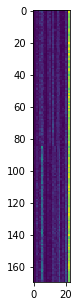

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(np.mean(x,axis=1))
plt.show()

In [10]:
neurondata = np.zeros ((23,90,85))
mat = np.zeros ((23,85))
acc10 = np.zeros ((90,))
acc100 = np.zeros((90,))
i=0
while i < 23:
    neurondata [i,:,:] = np.mean(spike_count[i,:,:,:],axis=0)
    mat [i,:] = np.mean(neurondata[i,:,:],axis=0)
    i = i + 1

k=0
while k < 90:
    regr = linear_model.LogisticRegression()
    regr.fit(x[:,k,:], y)
    Y_pred = regr.predict(x[:,k,:])
    acc10 [k] = accuracy_score(y, Y_pred)
    k = k + 1 

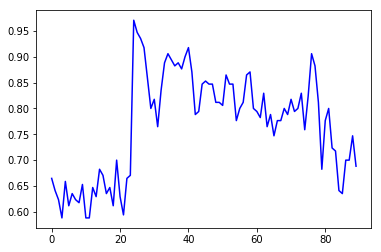

In [12]:
plt.plot(acc,'b-')
plt.show()